# Optimisation
## Travaux Pratiques - Optimisation sans contrainte

On souhaite optimiser les fonctions suivantes : 

\begin{align*}
    f(x_1,x_2)=(x_1^3-x_2)^2+2(x_2-x_1)^4
    \\
    g(x_1,x_2)=3x_1^2+8x_1x_2+9x_2^2+3x_1-4x_2
\end{align*}

Leur gradient sont respectivement : 

\begin{align*}
    \nabla f(x_1,x_2)= \begin{pmatrix}
    6x_1^5 - 6x_1^2x_2 - 8(x_2 - x_1)^3
    \\-2x_1^3 + 2x_2 + 8(x_2 - x_1)^3
\end{pmatrix}
\end{align*}

\begin{align*}
    \nabla g(x_1,x_2)=
    \begin{pmatrix}
 6x_1+8x_2+3 \\
8x_1+18x_2-4
\end{pmatrix}
\end{align*}

Leur matrice hessienne sont :

\begin{align*}    
\nabla^2 f(x_1,x_2)= \begin{pmatrix} 
30x_1^4-12x_1x_2+24(x_2-x_1)^2&-6x_1^2-24(x_2-x_1)^2 
\\ 
-6x_1^2-24(x_2-x_1)^2&2+24(x_2-x_1)^2
\end{pmatrix}
\end{align*}

\begin{align*}    
    \nabla^2 g(x_1,x_2)=\begin{pmatrix}6&8\\8&18\end{pmatrix}
\end{align*}

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
def f(x):
    x1, x2 = x[0], x[1]
    return (x1**3 - x2)**2 + 2*(x2 - x1)**4

def g(x):
    x1, x2 = x[0], x[1]
    return 3*x1**2 + 8*x1*x2 + 9*x2**2 + 3*x1 - 4*x2

def gradf(x):
    x1, x2 = x[0], x[1]
    y1 = 6*x1**5 - 6*x1**2*x2 - 8*(x2 - x1)**3
    y2 = -2*x1**3 + 2*x2 + 8*(x2 - x1)**3
    return np.array([y1, y2])

def gradg(x):
    x1, x2 = x[0], x[1]
    y1 = 6*x1 + 8*x2 + 3
    y2 = 8*x1 - 18*x2 - 4
    return np.array([y1, y2])

#### On affiche les fonctions : 
Tout d'abord, on établit la définition des variables : 

In [3]:
x = np.arange(-3.0,3.0,0.1)
y = np.arange(-3.0,3.0,0.1)
X,Y = np.meshgrid(x, y) # grille de points

On evalue f :

In [4]:
Zf = f([X, Y]) # 

On affiche f : 

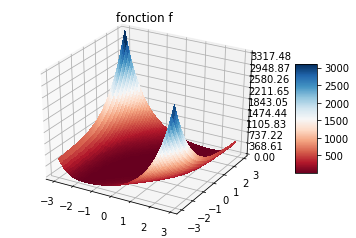

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d', title='fonction f')

surf = ax.plot_surface(X, Y, Zf, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

On evalue g : 

In [6]:
Zg = g([X, Y]) # Evaluation de g 

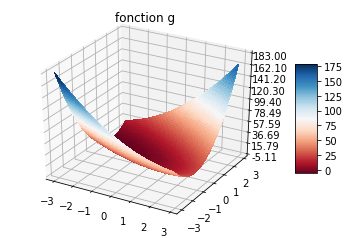

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d', title='fonction g')

surf = ax.plot_surface(X, Y, Zg, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 1- Implémentation de la méthode de gradient
***

#### Algorithme de gradient générique : 

Construction d'une suite telle que 


\begin{align*}
    x_{k+1} = x_k - \alpha_k D_k \nabla f(x_k)
\end{align*}

où $\alpha_k$est tel que : 

\begin{align*}
    f(x_k-\alpha_kD_k\nabla f(x_k)) = min_{\alpha\ge0} (f(x_k-\alpha D_k \nabla f(x_k))
\end{align*}


et $D_k$ est une matrice définie positive 

***
***

#### Algorithme de la plus grande pente : 

$D_k = I$

Soif $f \in C^1$, $x_0$, et $\alpha_k > 0$ k=0,1,2,...

Arrêt = faux; k=0

Tant que Arrêt = Faux, Faire 

Debut
<br>
&emsp;$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$<br>
&emsp;Si (Cond d'arrêt) alors Arrêt=vrai<br>
&emsp;Sinon k=k+1<br>
Fin

***

In [142]:
#Définition du pas alpha : 
alpha = 0.1

#Pc = Pas constant

def Gradient(f, gradf, x, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=10000):
    Arret=False
    k=0
    X_array=np.array([x])
    
    while(Arret==False) and (k < stepmax):
        """On vérifie si le pas est constant ou non, si le pas n'est pas constant, 
        on le calcule grâce à optimize.line_search"""
        if not(PC):
            result_alpha = optimize.line_search(f,gradf,x,-gradf(x))
            alpha=result_alpha[0]
        #On calcul x_k+1 à partir de x_k grâce à la formule : 
        x = x - alpha*gradf(x)
        X_array=np.concatenate([X_array,[x]])
        
        #Si le gradient de la fonction est très proche de zéro (inférieur à espilon) pour la valeur de x, on arrête l'algorithme
        #Sinon, on incrémente k
        if np.linalg.norm(gradf(x)) < epsilon:
            Arret=True    
        else:
            k+=1
    
    print('{} iterations'.format(k))
    return X_array, x

#### On compare les méthodes codées ci-dessus avec les méthodes de : 
- Méthode de Newton *`optimize.fmin_ncg`*
- Gradient conjugué *`optimize.fmin_cg`*
- Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP) mentionnée en cours : *`optimize.fmin_bfgs`*
- Force Brute *`optimize.brute`*

Pour cela, on code la fonction *`compare_fncts`*

In [169]:
def compare_fncts(x0, f, fprime, nb_iter=1):

    print('Gradient à pas constants')
    t1 = time.time()
    for i in range(nb_iter):
        X_GPC, x_gpc = Gradient(f=f, gradf=fprime, x=x0, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=10000000)
    t2 = time.time()
    print('    x optimal = [{0:.4f},{0:.4f}]\n    en {1:.2f}s'.format(x_gpc[0],x_gpc[1], (t2-t1)/nb_iter))
    
    
    print('Gradient à pas variables')
    t1 = time.time()
    for i in range(nb_iter):
        XGPV,x_gpv = Gradient(f=f, gradf=fprime, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=10000000)
    t2 = time.time()
    print('    x optimal = [{0:.4f},{0:.4f}]\n   en {1:.2f}s'.format(x_gpv[0],x_gpv[1], (t2-t1)/nb_iter))
    
    
    print('\n\nAlgorithme de Newton')
    t1 = time.time()
    for i in range(nb_iter):
        x_new = optimize.fmin_ncg(f=f,x0=x0,fprime=gradf)
    t2 = time.time()
    print('    x optimal = [{0:.5f}, {0:.5f}]\n  en {1:.2f}s'.format(x_new[0], x_new[1], (t2-t1)/nb_iter))    
    
    
    print('\n\nGradient conjugué')
    t1 = time.time()
    for i in range(nb_iter):
        x_gc = optimize.fmin_cg(f=f,x0=x0,fprime=gradf)
    t2 = time.time()
    print('    x optimal = [{0:.5f}, {0:.5f}]\n  en {1:.2f}s'.format(x_gc[0], x_gc[1], (t2-t1)/nb_iter))
    
    
    
    print('\n\nQuasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)')
    t1 = time.time()
    for i in range(nb_iter):
        x_quasi_new = optimize.fmin_bfgs(f=f,x0=x0,fprime=gradf)
    t2 = time.time()
    print('    x optimal = [{0:.5f}, {0:.5f}]\n  en {1:.2f}s'.format(x_quasi_new[0], x_quasi_new[1], (t2-t1)/nb_iter))
    
    
    """
    print('\n\nForce Brute')
    t1 = time.time()
    for i in range(nb_iter):
        x_brute = optimize.brute(func=f,ranges=(-5.0,5.0))
    t2 = time.time()
    print('    x optimal = [{0:.5f}, {0:.5f}]\n  en {1:.2f}s'.format(x_brute[0], x_brute[1], (t2-t1)/nb_iter))
    """

**Initialisation des paramètres : **

In [170]:
x0=np.array([0.2,0.2])

**Execution de la fonction :**

In [171]:
compare_fncts(x0,f=f,fprime=gradf,nb_iter=1)

Gradient à pas constants
116128 iterations
    x optimal = [0.0023,0.0023]
    en 0.00s
Gradient à pas variables
19536 iterations
    x optimal = [0.0018,0.0018]
   en 0.00s


Algorithme de Newton
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 72
         Hessian evaluations: 0
    x optimal = [0.00338, 0.00338]
  en 0.00s


Gradient conjugué
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 10
         Function evaluations: 22
         Gradient evaluations: 22
    x optimal = [0.00030, 0.00030]
  en 0.00s


Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
    x optimal = [0.0

#### Illustration de la convergence pour les méthodes de gradient à pas constant ou non: 

100000 iterations
19536 iterations


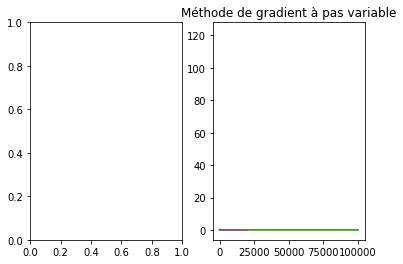

In [178]:
X_GPC, x_gpc = Gradient(f=f, gradf=gradf, x=x0, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=100000)
X_GPV,x_gpv = Gradient(f=f, gradf=gradf, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=100000)

C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


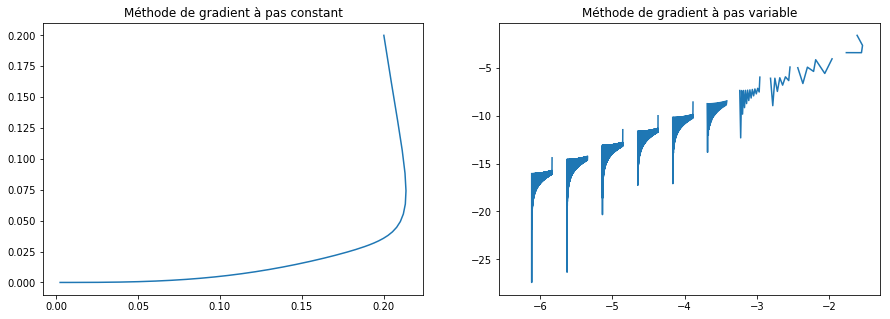

In [193]:
#Façon d'approcher le point : 

fig = plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Méthode de gradient à pas constant')
plt.plot(X_GPC[:,0],X_GPC[:,1])

plt.subplot(1,2,2)
plt.title('Méthode de gradient à pas variable')
plt.plot(np.log(X_GPV[:,0]),np.log(X_GPV[:,1]))

plt.tight_layout
plt.show()

In [ ]:
#Vitesse de convergence : 

fig = plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Méthode de gradient à pas constant')
plt.plot(np.,f(X_GPC[:,0],X_GPC[:,1]))

plt.subplot(1,2,2)
plt.title('Méthode de gradient à pas variable')
plt.plot(,f(X_GPV[:,0],X_GPV[:,1])

plt.tight_layout
plt.show()

#### Critère d'arrêt : En tester plusieurs ! 

#### Pour la fonction quadratique et convexe :
<br>Gradient : linérairemnt
<br>Newton : peu d'iter
<br>Gradient conjugué : n iter
<br> et tester le alpha avec les valeurs propres vues en classe 

Dans chaque cas, on essaiera d’améliorer les performances de la méthode en modifiant les paramètres par défaut, en ayant recours au calcul exacte du gradient, de la matrice Hessienne,….

On comparera le nombre d’itérations, la précision et on illustrera la vitesse de convergence.

## Avec g(x) : 

In [194]:
compare_fncts(x0,f=g,fprime=gradg,nb_iter=1)

Gradient à pas constants


C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 